                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -254.150
Date:                Thu, 16 Nov 2023   AIC                            514.300
Time:                        07:17:59   BIC                            522.086
Sample:                             0   HQIC                           517.450
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6504      0.090      7.258      0.000       0.475       0.826
ma.L1          0.5256      0.088      5.994      0.000       0.354       0.697
sigma2         9.7934      1.405      6.970      0.0

c:\Users\ashiq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


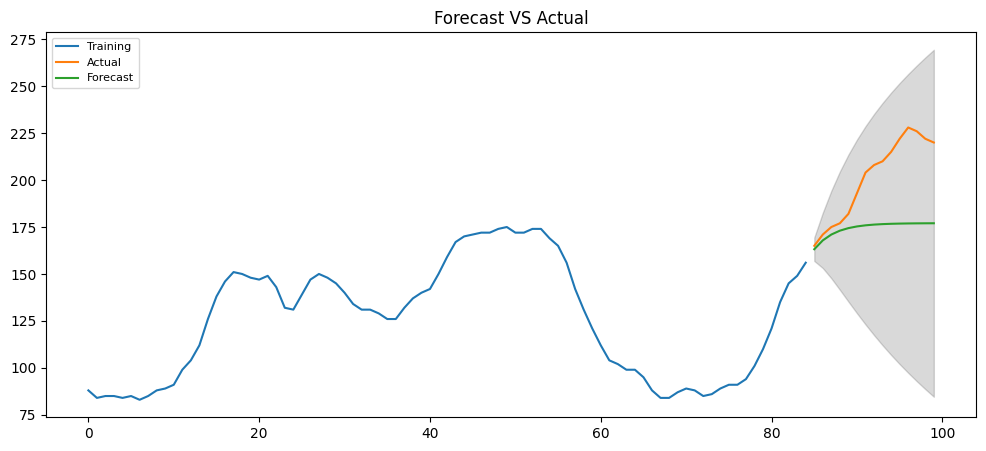

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})


# File_Input_Path = "D:\Pranto\study\4_1\Computer_Simulation_and_Modeling\Lab\Forecast\"
# Input_File_Name = "wwwusage.csv"
# file_path = os.path.join(File_Input_Path, Input_File_Name)


df = read_csv('./wwwusage.csv', names=['value'], header=0)


# The optimal ARIMA model using Out-of-Time Cross-validation
model = ARIMA(df.value, order=(1, 1, 1))
model_fit = model.fit()


# Print model summary if needed
print(model_fit.summary())


# Split the dataset into training and testing sets
size = int(len(df) * 0.85)
train, test = df.value[:size], df.value[size:]


# Fit the model on the training data
model_fit = ARIMA(train, order=(1, 1, 1)).fit()


# Forecast
fc = model_fit.get_forecast(len(test), alpha=0.05)
fc_series = fc.predicted_mean
conf_int = fc.conf_int()
lower_series = conf_int.iloc[:, 0]
upper_series = conf_int.iloc[:, 1]


# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast VS Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()
